# Исследование сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

**Тарифы:**

**без подписки**
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

**с подпиской Ultra**
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**Задачи:**

**1. Загрузка данных.**

   1.1 Считайте CSV-файлы с данными.
   
   1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

**2. Предобработка данных**

   2.1 Привеcти столбец date к типу даты pandas.
    
   2.2 Создайте новый столбец с номером месяца на основе столбца date.
    
   2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

**3. Исследовательский анализ данных.** Опишите и визуализируйте общую информацию о пользователях и поездках:
    
   3.1 частота встречаемости городов;
    
   3.2 соотношение пользователей с подпиской и без подписки;
    
   3.3 возраст пользователей;
    
   3.4 расстояние, которое пользователь преодолел за одну поездку;
    
   3.5 продолжительность поездок.

**4. Объединение данных.**

   4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
    
   4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
   
   - c данными о пользователях без подписки;
   - с данными о пользователях с подпиской.
    
   4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

**5. Подсчёт выручки.**

   5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    
   5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

**6. Проверка гипотез.**

   6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
   
   6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

   6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
   
   6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Описание данных**

**Пользователи — users_go.csv**

user_id	- уникальный идентификатор пользователя

name - имя пользователя

age - возраст

city - город

subscription_type - тип подписки (free, ultra)

**Поездки — rides_go.csv**

user_id	- уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

**Подписки — subscriptions_go.csv**

subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

#### Шаг 1. Загрузка данных

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

Считывам CSV-файлы с данными:

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Проверим данные на пропущенные значения:

In [3]:
users.info()
rides.info()
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

Посмотрим на каждую таблицу:

In [4]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Выводы:** На первый взгляд пропуски в данных отсутствуют. Также из данных видно что в датафрейме rides столбец "date" типа object нужно привести к типу данных datetime.

#### Шаг 2. Предобработка данных

**Приведем столбец date к типу даты pandas.**

In [7]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Данные соответствуют нужному типу, можно двигаться дальше

**Создадим новый столбец с номером месяца на основе столбца date.**

In [8]:
rides['month'] = rides['date'].dt.month
rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


**Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.**

Проверим пропущенные значения в датафреймах:

In [9]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [11]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверим дубликаты в датафреймах:

In [12]:
users.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1560     True
1561     True
1562     True
1563     True
1564     True
Length: 1565, dtype: bool

In [13]:
users.duplicated().sum()

31

Уберем явные дубликаты

In [14]:
users = users.drop_duplicates()

In [15]:
users.duplicated().sum()

0

In [16]:
rides.duplicated().sum()

0

In [17]:
subscriptions.duplicated().sum()

0

In [18]:
# Код ревьюера

users.duplicated().sum()

0

In [19]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

С городами также все хорошо. Неявные дубликаты отсутствуют

In [20]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

С именами тоже все в порядке

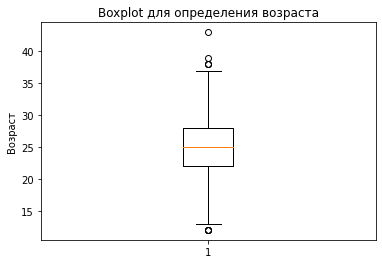

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


In [21]:
plt.boxplot(users['age'])
plt.title("Boxplot для определения возраста")
plt.ylabel("Возраст")
plt.show()
users.describe()

В возрасте аномалий не найдено.

**Вывод:** осуществлена предобработка данных. Столбец "date" приведен к нужному типу. Добавлены номера месяцев. Удалены явные дубликаты. Осуществлена проверка на неявные дубликаты.

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
    
   3.1 частота встречаемости городов;
    
   3.2 соотношение пользователей с подпиской и без подписки;
    
   3.3 возраст пользователей;
    
   3.4 расстояние, которое пользователь преодолел за одну поездку;
    
   3.5 продолжительность поездок.

**3.1. Изучим частоту встречаемости городов.**

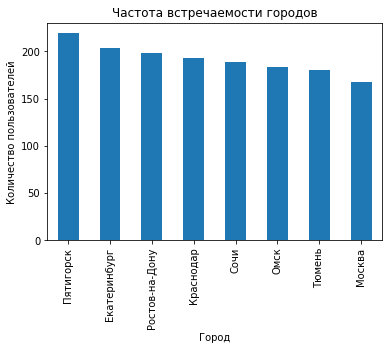

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [22]:
city_counts = users['city'].value_counts()
city_counts.plot(x='city', kind='bar')

plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.show()
city_counts

Исходя из диаграммы сервис представлен в основном в областных центрах. Больше всего пользователей из Пятигорска. Это достаточно большой процент, учитывая, что Пятигорск сравнительно небольшой город в сравнении с другими находящимися в топе. Меньше всего пользователей в Москве.

**Изучим соотношение пользователей с подпиской и без подписки.**

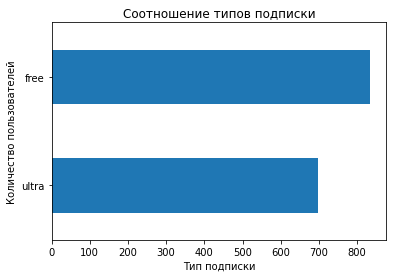

free     835
ultra    699
Name: subscription_type, dtype: int64

In [23]:
subscriptions_counts = users['subscription_type'].value_counts()
subscriptions_counts.sort_values(ascending=True).plot(kind='barh')

plt.title('Соотношение типов подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.show()
subscriptions_counts

Text(0.5, 1.0, 'Процентное соотношение типов подписки')

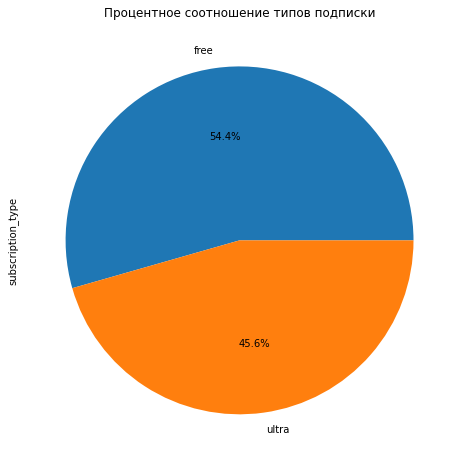

In [24]:
plt.figure(figsize=(8,8))
subscriptions_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Процентное соотношение типов подписки')

Как и ожидалось пользователей без подпиcки больше, 54%. Однако обычно количество пользователей с подпиской гораздо больше чем в обычном сервисе самокатов и составляет практически половину, а именно 46%

**Изучим возраст пользователей.**

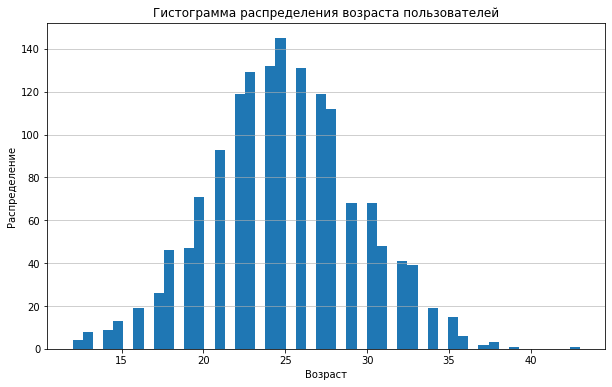

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(users['age'], bins=50, range=(12, 43))
plt.title('Гистограмма распределения возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Распределение')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [26]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст пользователя 24 года. Минимальный возраст 12 лет, видимо это ограничение сервиса. Максимальный возраст 43 года.

**Изучим расстояние, которое пользователь преодолел за одну поездку.**

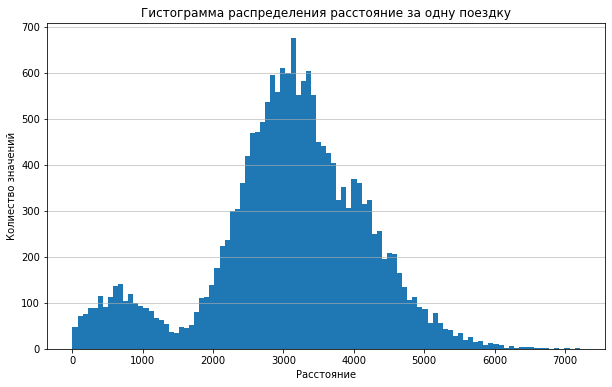

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(rides['distance'], bins=100, range=(rides['distance'].min(), rides['distance'].max()))
plt.title('Гистограмма распределения расстояние за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Колиество значений')
plt.grid(axis='y', alpha=0.75)
plt.show()
rides['distance'].describe()

График выглядит необычно. Его можно условно разделить на два типа поездок, короткие и длинные. Короткие допустим от дома до метро. Длинные это уже от точки А в точку Б. В среднем поездка составяет 3 км. Но не более 7.2 км. Возможно если бы сервис был представлен более широко в крупных городах типа Санкт-Петербурга и Москвы, то цифры были бы другие.

**Изучим продолжительность поездок.**

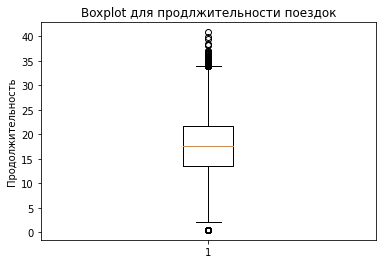

In [28]:
plt.boxplot(rides['duration'])
plt.title("Boxplot для продлжительности поездок")
plt.ylabel("Продолжительность")
plt.show()

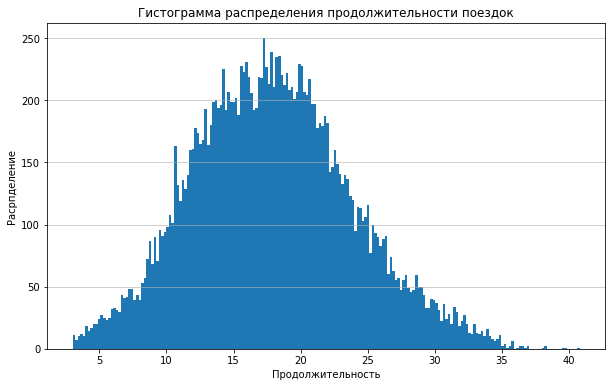

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(rides['duration'], bins=200, range=(3, rides['duration'].max()))
plt.title('Гистограмма распределения продолжительности поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Расрпделение')
plt.grid(axis='y', alpha=0.75)
plt.show()
rides['duration'].describe()

В среднем поездка занимает 17 минут. Минимальное значение 0, скорей всего связано с тем, что пользователь взял самокат и понял, что он неисправен или низкий заряд аккумулятора. Смотря на Усы можно сказать что большинство поездок ранжируются от 10 до 20 минут

**Вывод:** Были проанализированы и визуализированы данные. А именно:

- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

#### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().
    
4.2 Создадим два датафрейма из датафрейма на основе общего датафрейма:
   
   - c данными о пользователях без подписки;
   - с данными о пользователях с подпиской.
   
4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().**

In [30]:
data = users.merge(rides).merge(subscriptions)
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [31]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**4.2 Создадим два датафрейма на основе общего:**

- C данными о пользователях без подписки.

In [32]:
data_free = data.query("subscription_type == 'free'")
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


- C данными о пользователях c подпиской.

In [33]:
data_ultra = data.query("subscription_type == 'ultra'")
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

Визуализируем информацию о расстоянии для двух датафреймов:

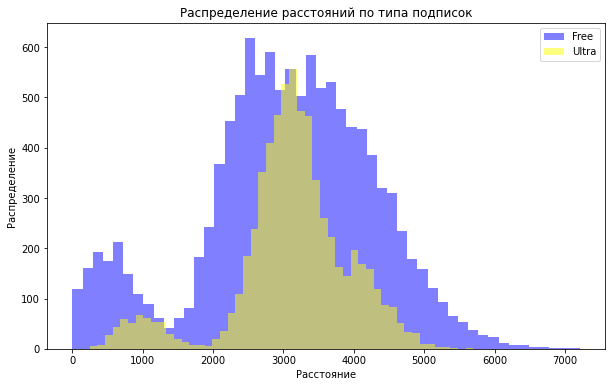

In [34]:
plt.figure(figsize=(10, 6))

# Построим гистограмму без подписки
plt.hist(data_free['distance'], bins=50, alpha=0.5, label='Free', color='blue')
# Построим гистограмму для подписки Ultra
plt.hist(data_ultra['distance'], bins=50, alpha=0.5, label='Ultra', color='yellow')

plt.title('Распределение расстояний по типа подписок')
plt.xlabel('Расстояние')
plt.ylabel('Распределение')
plt.legend()
plt.show()

In [35]:
print(data_free['distance'].describe())
data_ultra['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Исходя из графиков можно сделать вывод, что в среднем расстояние поездки для пользователей без подписки больше.

Визуализируем информацию о времени поездки для двух датафреймов:

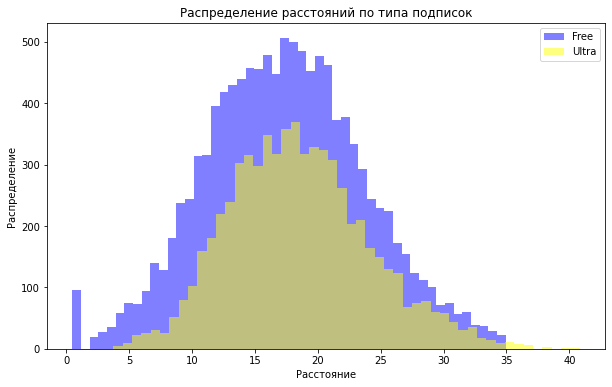

In [36]:
plt.figure(figsize=(10, 6))

# Построим гистограмму без подписки
plt.hist(data_free['duration'], bins=50, alpha=0.5, label='Free', color='blue')
# Построим гистограмму для подписки Ultra
plt.hist(data_ultra['duration'], bins=50, alpha=0.5, label='Ultra', color='yellow')

plt.title('Распределение расстояний по типа подписок')
plt.xlabel('Расстояние')
plt.ylabel('Распределение')
plt.legend()
plt.show()

In [37]:
print(data_free['duration'].describe())
data_ultra['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Исходя из графиков можно сделать вывод, что у людей с подпиской время поездок в среднем меньше.

**Вывод:** Данные были объединены в общий dataframe. Отдельно были созданы два датафрейма с пользователями без подписки и с подпиской. Проведена визуализация данных из которой можно сделать следующие выводы:

 - в среднем расстояние поездки для пользователей без подписки больше.
 
 - в среднем расстояние у людей с подпиской время поездок в меньше.

#### Шаг 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

Округлим значения:

In [38]:
data['duration'] = np.ceil(data['duration']) 

In [39]:
data_aggregated = data.groupby(['user_id', 'month']
                           ).agg({'distance':'sum', 'duration':['sum', 'count'],
                                  'subscription_type':'first',
                                  'minute_price':'first',
                                  'start_ride_price':'first',
                                  'subscription_fee':'first'}).reset_index()
data_aggregated

user_id month      distance duration       subscription_type  \
                              sum      sum count             first   
0           1     1   7027.511294     42.0     2             ultra   
1           1     4    754.159807      7.0     1             ultra   
2           1     8   6723.470560     46.0     2             ultra   
3           1    10   5809.911100     32.0     2             ultra   
4           1    11   7003.499363     56.0     3             ultra   
...       ...   ...           ...      ...   ...               ...   
11326    1534     6   3409.468534     26.0     2              free   
11327    1534     8   7622.453034     48.0     2              free   
11328    1534     9   4928.173852     23.0     1              free   
11329    1534    11  13350.015305     78.0     4              free   
11330    1534    12   2371.711192     16.0     1              free   

      minute_price start_ride_price subscription_fee  
             first            first            first  
0                6                0              199  
1                6                0              199  
2                6                0              199  
3                6                0              199  
4                6                0              199  
...            ...              ...              ...  
11326            8               50                0  
11327            8               50                0  
11328            8               50                0  
11329            8               50                0  
11330            8               50                0  

[11331 rows x 9 columns]

**5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.**

In [40]:
data_aggregated.columns = ['user_id', 'month', 'distance_sum', 'duration_sum', 'rides_count',
                         'subscription_type', 'minute_price',
                         'start_ride_price', 'subscription_fee']
 
#расчёт выручки функцией (можно и без неё)
def monthly_revenue(row):
    return row['start_ride_price'] * row['rides_count'] + row['minute_price'] * row['duration_sum'] + row['subscription_fee']
 
data_aggregated['monthly_revenue'] = data_aggregated.apply(monthly_revenue, axis=1)
data_aggregated

,user_id,month,distance_sum,duration_sum,rides_count,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,free,8,50,0,308.0
11327,1534,8,7622.453034,48.0,2,free,8,50,0,484.0
11328,1534,9,4928.173852,23.0,1,free,8,50,0,234.0
11329,1534,11,13350.015305,78.0,4,free,8,50,0,824.0


**Вывод:** Был проанализрован подсчет выручки.

 - Было найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

 - Была подсчитана помесячная выручка по пользователям.

#### Шаг 6. Проверка гипотез

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

**H0** - Пользователи с подпиской и без подписки тратят одинаковое количество времени на поездки.

**H1** - Пользователи с подпиской тратят больше времени на поездки

In [41]:
alpha = 0.05
 
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу.')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотез не подтверждена. Значит пользователи с подпиской тратят больше времени на поездки.

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

**H0** - Среднее расстояния, которое проезжают пользователи, не больше 3130 метров.

**H1** - Среднее расстояние больше 3130 метров.

In [42]:
optimal = 3130
alpha = 0.05

results = st.ttest_1samp(data_ultra['duration'], optimal, alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу')

p-значение: 0.0
Нельзя отвергнуть нулевую гипотезу


**Вывод:** Нулевая гипотез не подтверждена. Значение p равно 0, значит среднее расстояние, которое пользователи проезжают за одну поездку больше 3130 метров.

**6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

**H0** - Среднее месячная выручка от пользователей с подпиской не больше чем от пользователей без подписки.

**H1** - Среднее месячная выручка от пользователей с подпиской больше чем от пользователей без подписки.

In [44]:
example_free = data_aggregated.query('subscription_type == "free"')['monthly_revenue']
example_ultra = data_aggregated.query('subscription_type == "ultra"')['monthly_revenue']

alpha = 0.05

results = st.ttest_ind(example_free, example_ultra, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу.')


p-значение: 1.0
Нельзя отвергнуть нулевую гипотезу.


**Вывод:** Нулевая гипотез не подтверждена. В данном случае, значение p-значения составило 1.0, что означает, что нулевую гипотезу о том, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки, не удалось отвергнуть. В нашем случае значение p составило 1, значит

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Для проверки гипотезы до и после обращений в техническую поддержку нужно использовать метод: scipy.stats.ttest_rel(). Для решения потребуется тест на равенство средних для зависимых выборок, до и после изменений.

**Вывод:** Осуществлена проверка следующих гипотез:

 - Гипотеза о том тратят ли пользователи с подпиской больше времени на поездки. **Нулевая гипотеза отвергнута**
 

 - Гипотеза о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. **Нельзя отвергнуть нулевую гипотезу**
 

 - Гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. **Нулевая гипотеза отвергнута**

**Был предоставлен ответ на вопрос:** "Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?"

# Вывод:

В результате работы был исследован сервис аренды самокатов Gofast. Проделана следующая работа:

1. Произведена загрузка данных.


2. Осуществлена предобработка данных. Был заменен тип данных столбца date. Добавлен столбец с месяцами. Была осуществлена проверка пропущенных значений. Произведен поиск дубликотов.


3. Были осуществлен исследовательский анализ данных в ходе, которого были сделаны следующие выводы:
 - Сервис наиболее популярен в Пятигорске и наименее популярен в Москве.
 
 - Пользователей без подписки больше 54.1%. 
 
 - Средний возраст пользователя 24 года. Возраст варьируется от 12 до 43 лет.
 
 - Среднее расстояние которое пользователь преодолевает за одну поездку 3 км.
 
 - Средняя продолжительность поездки 18 минут.
 
 
4. Данные были объединены в общий dataframe. Отдельно были созданы два датафрейма с пользователями без подписки и с подпиской. Проведена визуализация данных из которой можно сделать следующие выводы:

 - в среднем расстояние поездки для пользователей без подписки больше.
 
 - в среднем расстояние у людей с подпиской время поездок в меньше.


5. Был проанализрован подсчет выручки.

 - Было найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

 - Была подсчитана помесячная выручка по пользователям.


6. Осуществлена проверка гипотез. 
   
   Одна гипотеза была отвергнута, а именно:

 - Гипотеза о том тратят ли пользователи с подпиской больше времени на поездки.

   Две гипотезы подтверждены:

 - Гипотеза о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
 - Гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.